In [7]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download arashnic/faces-age-detection-dataset
! unzip faces-age-detection-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Train/4047.jpg          
  inflating: Train/4049.jpg          
  inflating: Train/405.jpg           
  inflating: Train/4051.jpg          
  inflating: Train/4052.jpg          
  inflating: Train/4053.jpg          
  inflating: Train/4055.jpg          
  inflating: Train/4056.jpg          
  inflating: Train/4057.jpg          
  inflating: Train/4058.jpg          
  inflating: Train/4059.jpg          
  inflating: Train/406.jpg           
  inflating: Train/4060.jpg          
  inflating: Train/4061.jpg          
  inflating: Train/4062.jpg          
  inflating: Train/4065.jpg          
  inflating: Train/4066.jpg          
  inflating: Train/4068.jpg          
  inflating: Train/4069.jpg          
  inflating: Train/407.jpg           
  inflating: Train/4070.jpg          
  inflating: Train/4072.jpg          
  inflating: Train/4073.jpg          
  inflating: Train/4076.jpg          
  inflating: Train/4078.jpg          

In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
import glob
import os
import seaborn as sns 
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [11]:
# read the csv file to check out the images and class
basic_data = pd.read_csv("/content/train.csv")
basic_data.head()

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE


In [12]:
# get the classes 
basic_data['Class'].unique()

array(['MIDDLE', 'YOUNG', 'OLD'], dtype=object)

In [13]:
# shapde of the dataset
basic_data.shape

(19906, 2)

In [14]:
basic_data['Class'].shape

(19906,)

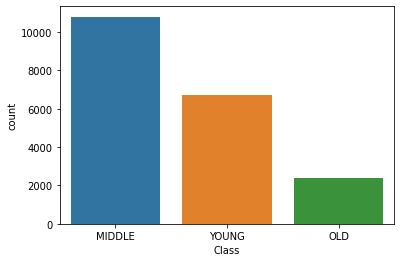

In [15]:
# count of each label in dataset
sns.countplot(x=basic_data['Class'])

In [16]:
basic_data.Class.value_counts()

MIDDLE    10804
YOUNG      6706
OLD        2396
Name: Class, dtype: int64

In [17]:
# replacing the class values
basic_data['Class'].replace(['YOUNG','MIDDLE','OLD'],[0,1,2],inplace=True)
basic_data.head(3)

,ID,Class
0,377.jpg,1
1,17814.jpg,0
2,21283.jpg,1


In [18]:
basic_data['Class'].value_counts()

1    10804
0     6706
2     2396
Name: Class, dtype: int64

In [19]:
# function to read the images
def readImage(path,ch = 3, resize=(150,150)):
	di = tf.io.read_file(path)
	di = tf.image.decode_jpeg(di, channels=ch)
	di = tf.image.convert_image_dtype(di, dtype=tf.float32)
	di = tf.image.resize(di, resize)
	return di

In [20]:
# function to load the data that includes images and respective labels
def load_data(image_path, label):
    img = readImage(image_path, 3, (150,150))
    
    return (img, label)

In [21]:
# built the list of image paths and list of respective responses of the images
PATH = "/content/Train"
image_paths = []
for path in os.listdir("/content/Train"):
    image_paths.append(PATH+"/"+path)
print(len(image_paths))

response_list = []

for i in image_paths:
    _,tail = os.path.split(i)
    response = basic_data.loc[basic_data['ID'] == tail]['Class'].values[0]
    response_list.append(response)
print(len(response_list))

19906
19906


In [24]:
# check the value in response list
response_list[17916]

2

In [25]:
# check the value in image list
image_paths[17916]

'/content/Train/19713.jpg'

In [26]:
# check the working of readImage function to read the image
readImage(image_paths[2],ch=3,resize=(150,150))

<tf.Tensor: shape=(150, 150, 3), dtype=float32, numpy=
array([[[1.29411772e-01, 1.13725498e-01, 7.05882385e-02],
        [1.29411772e-01, 1.13725498e-01, 7.05882385e-02],
        [1.27320275e-01, 1.11633994e-01, 6.84967339e-02],
        ...,
        [3.63398865e-02, 5.22882852e-04, 0.00000000e+00],
        [3.52941193e-02, 0.00000000e+00, 0.00000000e+00],
        [3.52941193e-02, 0.00000000e+00, 0.00000000e+00]],

       [[1.29411772e-01, 1.13725498e-01, 7.05882385e-02],
        [1.29411772e-01, 1.13725498e-01, 7.05882385e-02],
        [1.27320275e-01, 1.11633994e-01, 6.84967339e-02],
        ...,
        [3.63398865e-02, 5.22882852e-04, 0.00000000e+00],
        [3.52941193e-02, 0.00000000e+00, 0.00000000e+00],
        [3.52941193e-02, 0.00000000e+00, 0.00000000e+00]],

       [[1.27450988e-01, 1.11764714e-01, 6.86274543e-02],
        [1.27450988e-01, 1.11764714e-01, 6.86274543e-02],
        [1.25272349e-01, 1.09586060e-01, 6.64488003e-02],
        ...,
        [3.67756225e-02, 9.58618

Text(0.5, 0, '1')

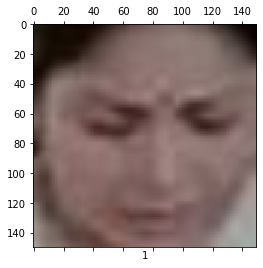

In [27]:
# plot the image
plt.matshow(readImage(image_paths[2],ch=3,resize=(150,150)))
plt.xlabel(response_list[2])

In [28]:
# check the shape of the image that we resized
readImage(image_paths[2],ch=3,resize=(150,150)).shape

TensorShape([150, 150, 3])

In [29]:
# split the dataset into train and test dataset
train_size = int(0.9*(len(image_paths)))
print(train_size)
test_size = int(0.1*(len(image_paths)))

train_set = tf.data.Dataset.from_tensor_slices((image_paths[:train_size], response_list[:train_size]))
test_set = tf.data.Dataset.from_tensor_slices((image_paths[test_size:], response_list[test_size:]))

17915


In [30]:
# check the items in the train set/ test set
for ele in test_set:
  print(ele)

Streaming output truncated to the last 5000 lines.
(<tf.Tensor: shape=(), dtype=string, numpy=b'/content/Train/25953.jpg'>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'/content/Train/4014.jpg'>, <tf.Tensor: shape=(), dtype=int32, numpy=1>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'/content/Train/25858.jpg'>, <tf.Tensor: shape=(), dtype=int32, numpy=2>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'/content/Train/15466.jpg'>, <tf.Tensor: shape=(), dtype=int32, numpy=2>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'/content/Train/26003.jpg'>, <tf.Tensor: shape=(), dtype=int32, numpy=1>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'/content/Train/2797.jpg'>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'/content/Train/14944.jpg'>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'/content/Train/11165.jpg'>, <tf.Tensor: shape=(), dtype=int32, numpy=1>)
(<tf.Te

In [32]:

train_set = (train_set
    .map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(64)
    .prefetch(tf.data.AUTOTUNE)
)

In [33]:
test_set = (test_set
    .map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(64)
    .prefetch(tf.data.AUTOTUNE)
)

In [34]:
# build the layers of CNN model
from tensorflow.keras import layers,models

cnn_model = models.Sequential([
    layers.Conv2D(filters=30, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3), padding = 'same'),
    layers.MaxPooling2D((2, 2)),
    
    # layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    layers.MaxPooling2D((2, 2)),

    # layers.BatchNormalization(),
    
    # layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    # layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    # layers.Dropout(0.25),
    layers.Dense(3, activation='softmax')
])

In [36]:
# view the summary of the cnn model
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 150, 150, 30)      840       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 75, 75, 30)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        17344     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 87616)             0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [37]:
# compile the model
cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
# fit the model
cnn_model.fit(train_set, epochs=10, validation_data=test_set)

Epoch 1/10
280/280 [==============================] - 31s 76ms/step - loss: 0.8646 - accuracy: 0.6205 - val_loss: 0.7658 - val_accuracy: 0.6526
Epoch 2/10
280/280 [==============================] - 21s 74ms/step - loss: 0.7267 - accuracy: 0.6797 - val_loss: 0.7072 - val_accuracy: 0.6980
Epoch 3/10
280/280 [==============================] - 21s 73ms/step - loss: 0.6458 - accuracy: 0.7244 - val_loss: 0.6161 - val_accuracy: 0.7361
Epoch 4/10
280/280 [==============================] - 22s 77ms/step - loss: 0.5626 - accuracy: 0.7655 - val_loss: 0.5511 - val_accuracy: 0.7695
Epoch 5/10
280/280 [==============================] - 22s 79ms/step - loss: 0.4875 - accuracy: 0.8004 - val_loss: 0.5207 - val_accuracy: 0.7840
Epoch 6/10
280/280 [==============================] - 22s 78ms/step - loss: 0.4193 - accuracy: 0.8272 - val_loss: 0.4999 - val_accuracy: 0.7997
Epoch 7/10
280/280 [==============================] - 21s 76ms/step - loss: 0.3547 - accuracy: 0.8587 - val_loss: 0.4767 - val_accuracy:

In [39]:
# train acccuracy
cnn_model.evaluate(train_set)

280/280 [==============================] - 14s 51ms/step - loss: 0.2784 - accuracy: 0.8911


[0.27839747071266174, 0.891096830368042]

In [40]:
# test accuracy
cnn_model.evaluate(test_set)

280/280 [==============================] - 13s 48ms/step - loss: 0.3718 - accuracy: 0.8722


[0.3717717230319977, 0.8722370862960815]

In [41]:
# get the test predictions
test_pred = cnn_model.predict(test_set)

280/280 [==============================] - 10s 35ms/step


In [42]:
print(test_pred)

[[7.5989947e-02 9.2379713e-01 2.1292901e-04]
 [9.8178989e-01 1.8209463e-02 7.5562622e-07]
 [2.6044342e-01 7.3954785e-01 8.7592907e-06]
 ...
 [7.9494724e-03 9.8124468e-01 1.0805742e-02]
 [1.7537404e-03 9.9824595e-01 3.9002495e-07]
 [4.3867704e-08 1.2918465e-02 9.8708147e-01]]


In [43]:
# compare the predictions and true reponses in test dataset
y_labels = [np.argmax(item) for item in test_pred]
print("Test Predictions response sample:",y_labels[:10])

test_response = response_list[test_size:]
print("Test True response sample:", test_response[:10])


# comparing y_labels(predicted test responses) and test_response(true test responses) 

Test Predictions response sample: [1, 0, 1, 1, 1, 1, 1, 0, 1, 0]
Test True response sample: [1, 0, 1, 1, 1, 2, 1, 1, 1, 0]


In [44]:
class_names = ['YOUNG','MIDDLE','OLD']

In [45]:
# funtion to plot confusio matrix to check the accuracy of each class value
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

Confusion matrix, without normalization


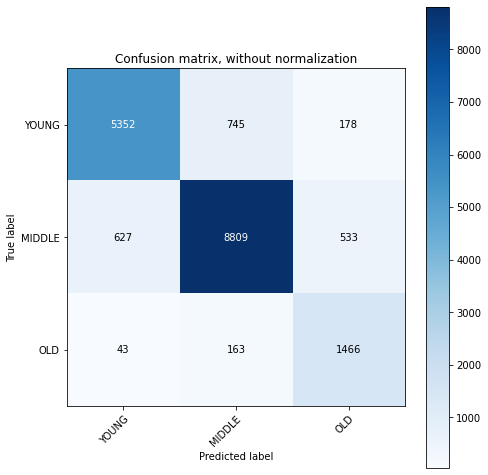

In [47]:
# plotting confusion matrix without normalization
plot_confusion_matrix(y_labels, test_response, classes=class_names,
                      title='Confusion matrix, without normalization')

Normalized confusion matrix


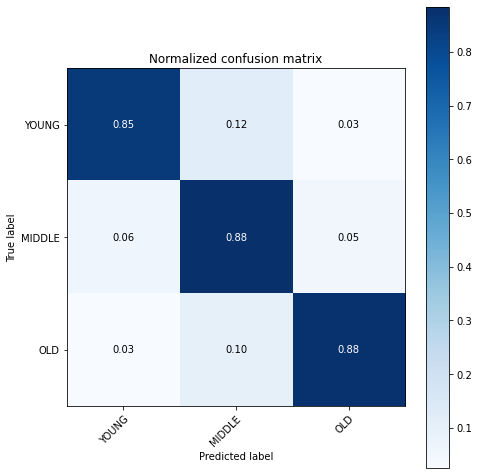

In [48]:
# plotting confusion matrix with normalization
plot_confusion_matrix(y_labels, test_response, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')